In [119]:
import matplotlib.pyplot as plt
import cv2 as cv
import numpy as np

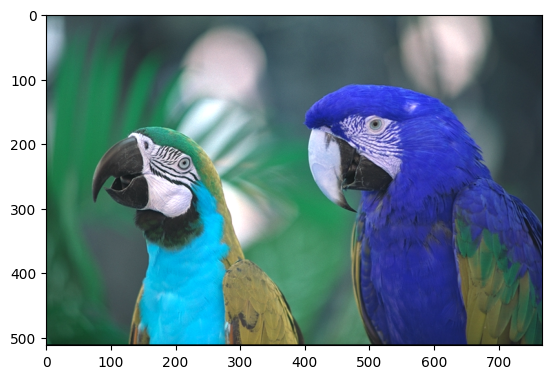

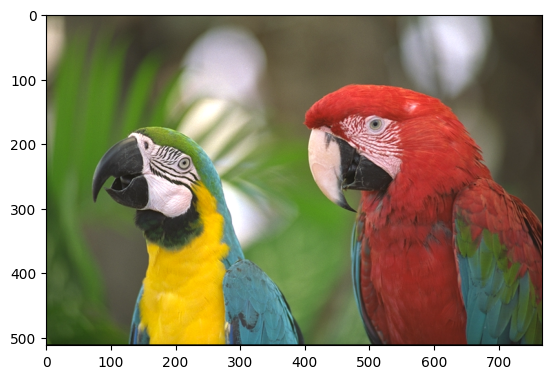

In [120]:
mainAfbeelding = cv.imread('img/kodim23.png')
plt.imshow(mainAfbeelding)
plt.show()
#to rgb
mainAfbeelding_rgb = cv.cvtColor(mainAfbeelding, cv.COLOR_BGR2RGB)

plt.imshow(mainAfbeelding_rgb)
plt.show()

In [121]:
# reshape the image to a 2d array of pixels and 3 color values (RGB)    
pixelValues_main = mainAfbeelding_rgb.reshape((-1,3))

# convert to float32
pixelValues_main = np.float32(pixelValues_main)
print(pixelValues_main.shape)

(393216, 3)


In [122]:
#define criteria and apply kmeans()
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 100, 0.2)
k = 8
_, labels, centers = cv.kmeans(pixelValues_main, k, None, criteria, 10, cv.KMEANS_RANDOM_CENTERS)

In [123]:
# convert back to uint8
centers = np.uint8(centers)

# flatten the labels array
labels = labels.flatten()

# convert pixels to the color of the centroids
segmented_image = centers[labels.flatten()]

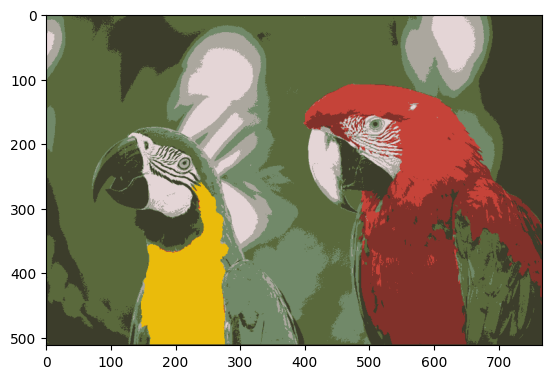

In [124]:
#reshape the segmented image to the size of the input image
segmented_image = segmented_image.reshape(mainAfbeelding_rgb.shape)

#show the image
plt.imshow(segmented_image)
plt.show()

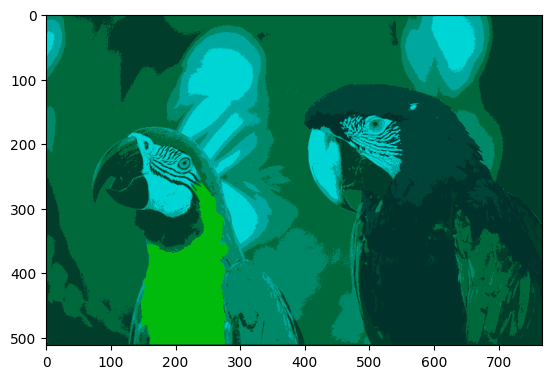

In [125]:
#only show green in segmented image
segmented_image[:,:,0] = 0  

plt.imshow(segmented_image)
plt.show()

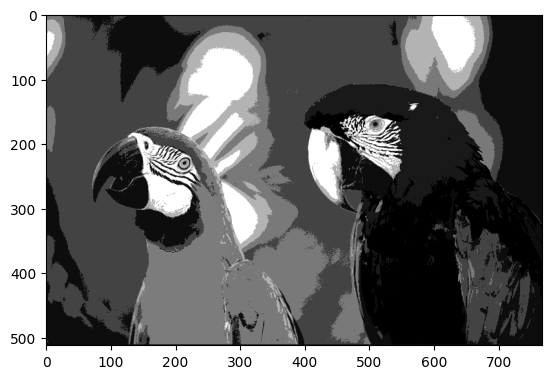

In [126]:
# segmented image to grayscale
segmented_image_gray = cv.cvtColor(segmented_image, cv.COLOR_BGR2GRAY)
plt.imshow(segmented_image_gray,cmap='gray')    
plt.show()

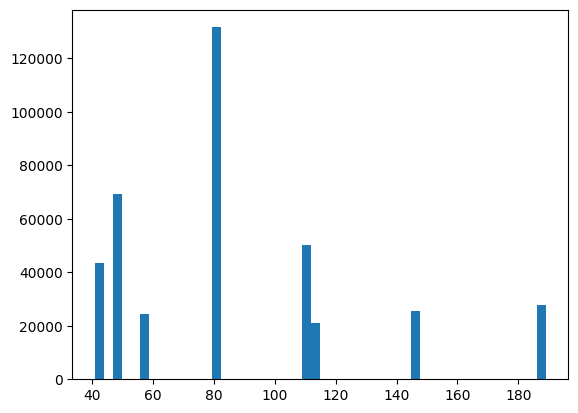

In [127]:
# make histogram of gray pixels
seg_flat = segmented_image_gray.flatten()
plt.hist(seg_flat, bins= 50)
plt.show()

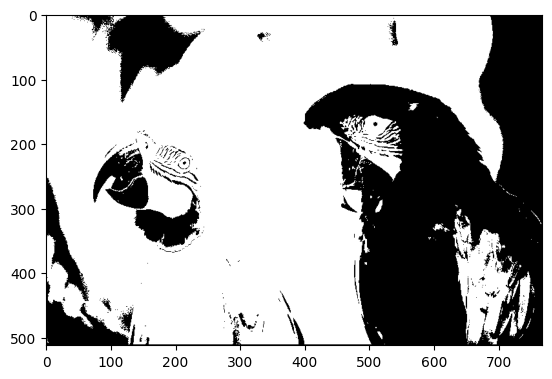

In [128]:
new_greyImage = segmented_image_gray > 60
plt.imshow(new_greyImage,cmap='gray')
plt.show()

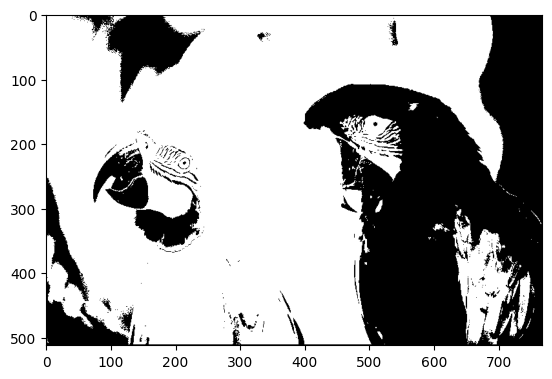

In [129]:
# create mask out of greyscale image
mask = np.zeros(mainAfbeelding_rgb.shape[:2], np.uint8)
mask[new_greyImage] = 255
plt.imshow(mask,cmap='gray')
plt.show()

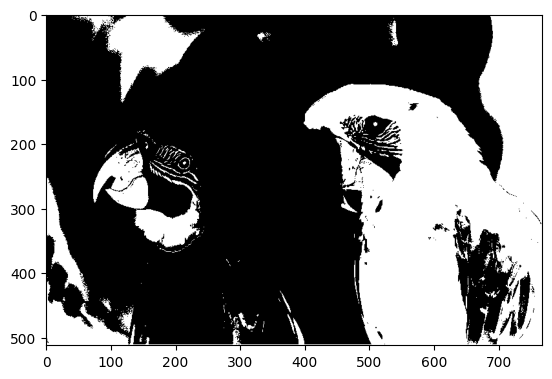

In [130]:
#invert black to white
mask_inv = cv.bitwise_not(mask) 
plt.imshow(mask_inv,cmap='gray')
plt.show()

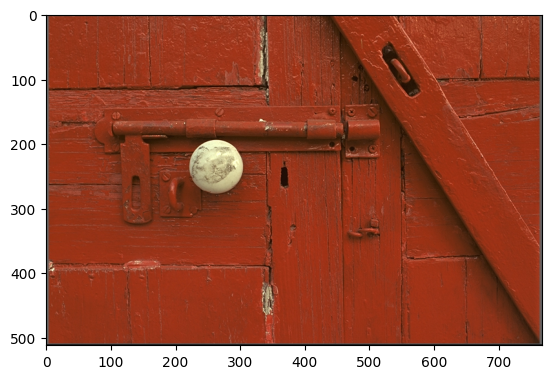

In [131]:
image_2_main = plt.imread('img/kodim02.png')
plt.imshow(image_2_main)
plt.show()

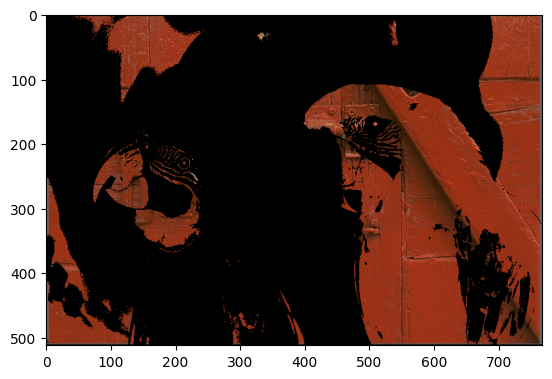

In [132]:
#put inv-mask over image
masked_image = cv.bitwise_and(image_2_main, image_2_main, mask=mask_inv)
plt.imshow(masked_image)
plt.show()

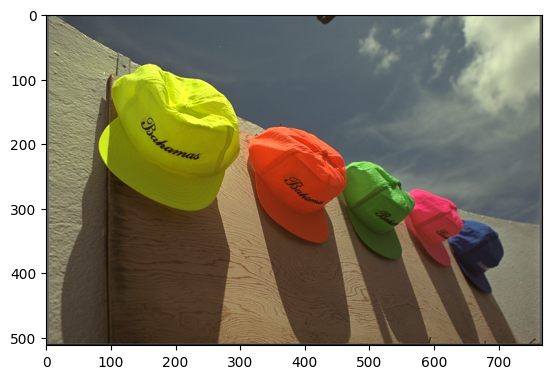

In [133]:
#load third image
image_3_main = plt.imread('img/kodim03.png')
plt.imshow(image_3_main)
plt.show()

In [48]:
print(image_3_main.shape)
print(masked_image.shape)

image_3_main = np.zeros(image_3_main.shape[:2], dtype="uint8")

print(image_3_main.shape)
print(masked_image.shape)

(512, 768)
(512, 768)
(512, 768)
(512, 768)


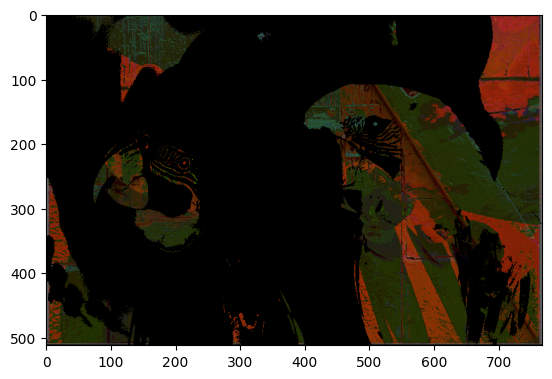

In [136]:
final_image = cv.bitwise_and(image_3_main, masked_image)
plt.imshow(final_image)
plt.show()